# Análise de Ferramentas de Visualização

Três opções serão comparadas:

* Matplotlib

* Plotly

* Seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
# Importando o dataset a ser utilizado
print('Dataset para diagnóstico de falhas em motores')
print('As colunas representam estatísticas retiradas em medições de vibração de motores no domínio do tempo')
df = pd.read_csv('data/feature_time_48k_2048_load_1.csv')
df

Dataset para diagnóstico de falhas em motores
As colunas representam estatísticas retiradas em medições de vibração de motores no domínio do tempo


,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


In [3]:
print('Tipos de falha no dataset:')
df['fault'].value_counts()

Tipos de falha no dataset:


fault
Ball_007_1    230
Ball_014_1    230
Ball_021_1    230
IR_007_1      230
IR_014_1      230
IR_021_1      230
OR_007_6_1    230
OR_014_6_1    230
OR_021_6_1    230
Normal_1      230
Name: count, dtype: int64

### 1. Matplotlib

**Prós:**

* Documentação da biblioteca é muito boa;
* Bastante utilizada, tendo muitos exemplos em fóruns;
* Permite um alta personalização dos gráficos.

**Contras:**

* Não possui gráficos pré-definidos, ou seja, costuma ser trabalhoso;
* Imagens estáticas e não interativas

**Exemplos de visualização:**


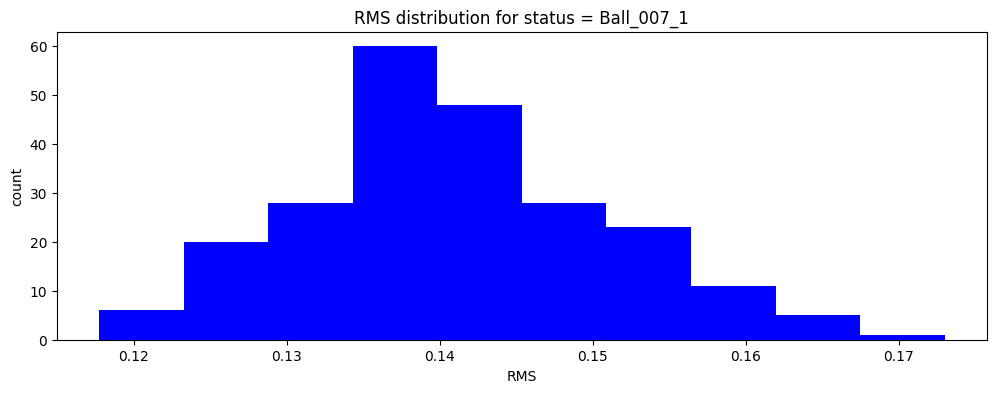

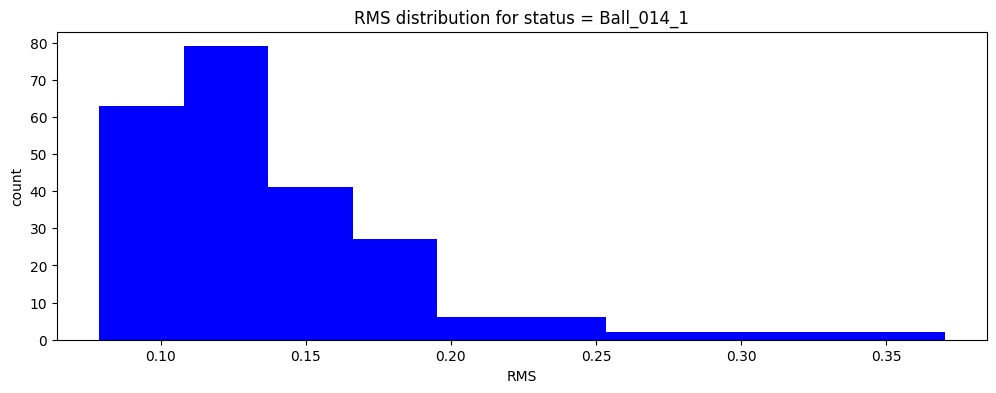

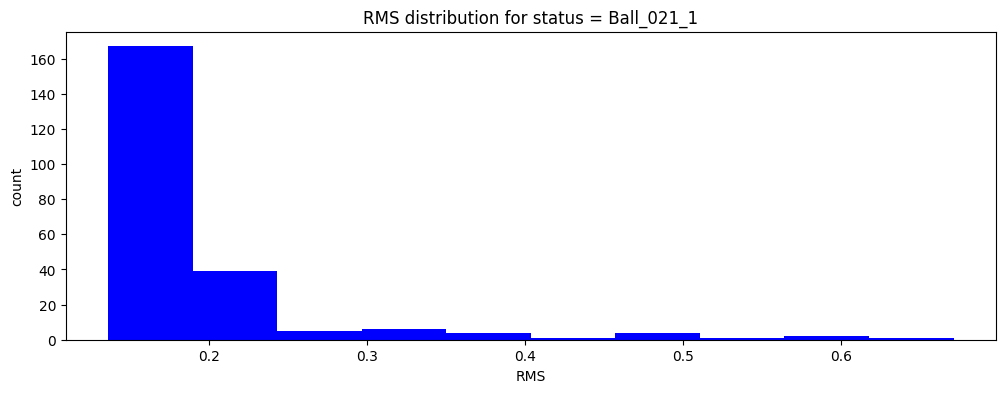

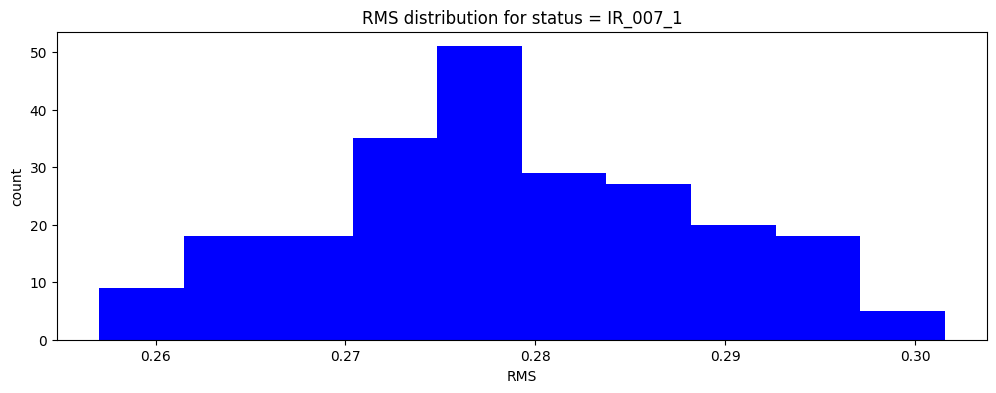

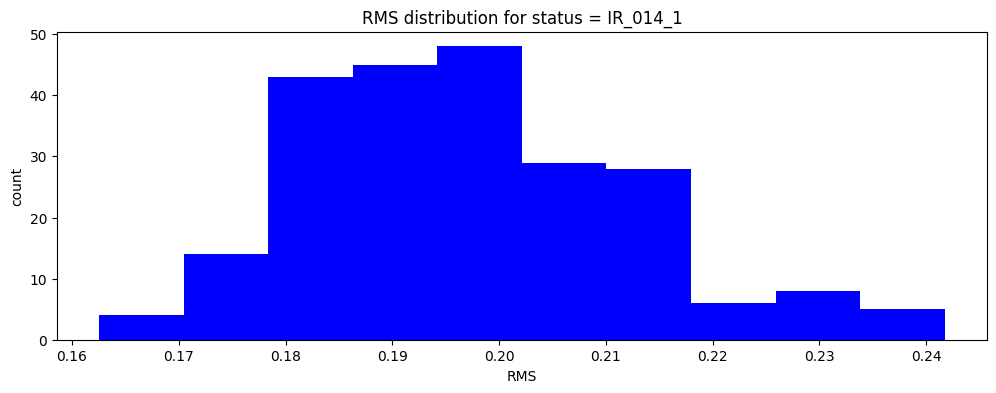

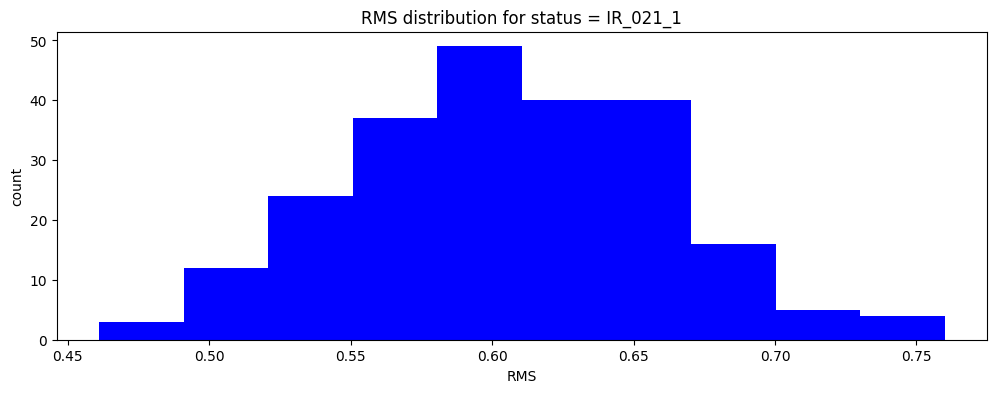

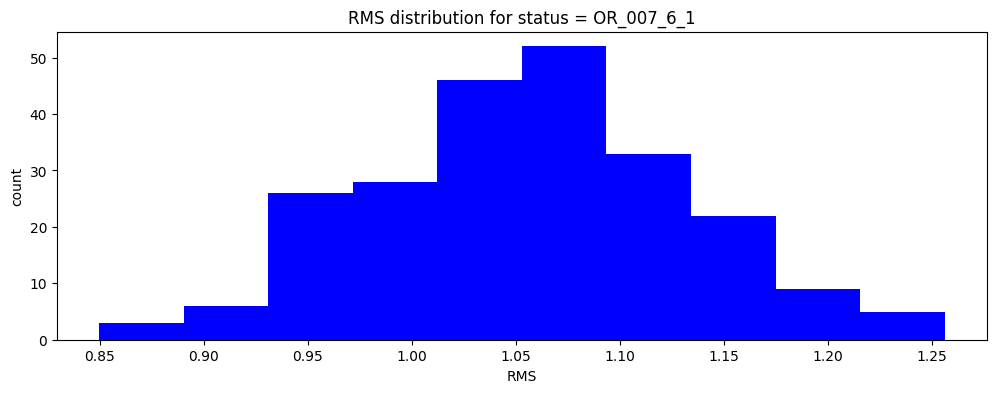

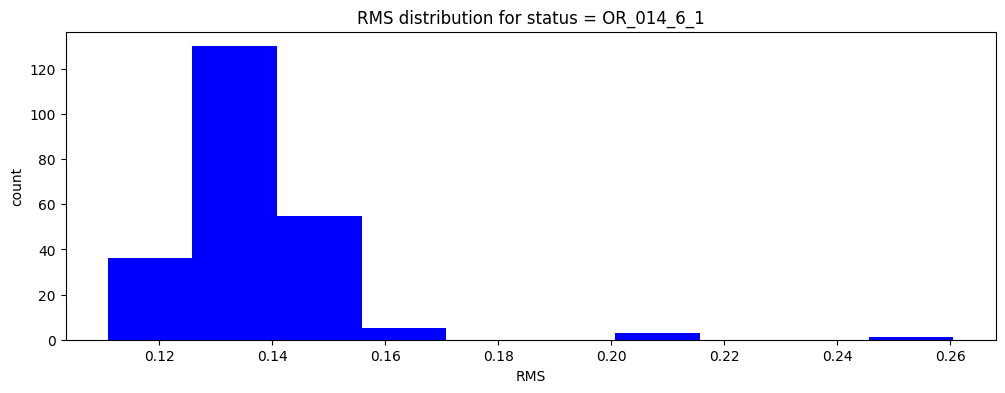

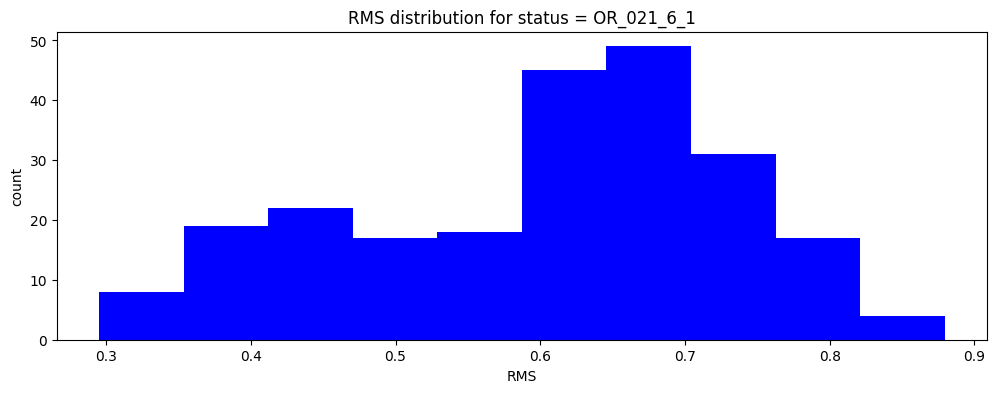

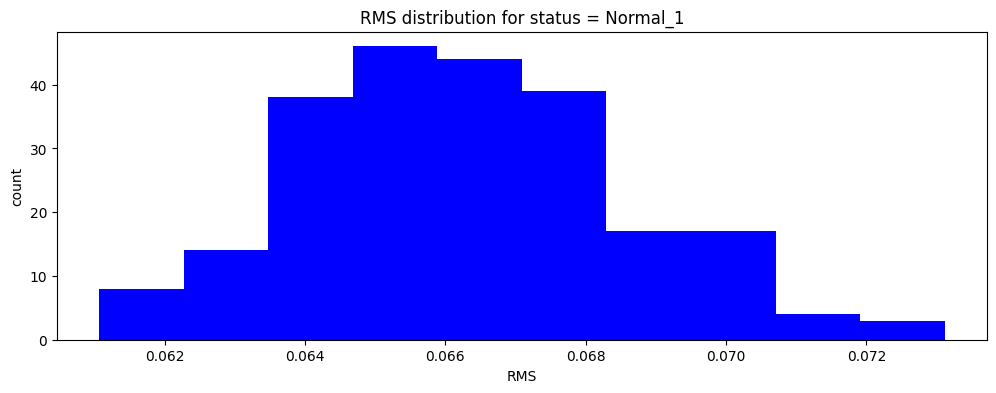

In [12]:
for fault_type in df['fault'].unique():
    plt.figure(figsize=(12,4))
    plt.hist(df.loc[df['fault'] == fault_type]['rms'],color='blue')
    plt.title(f'RMS distribution for status = {fault_type}')
    plt.xlabel('RMS')
    plt.ylabel('count')
    plt.show()


### 2. Plotly

**Prós:**


* Flexível quanto à personalização dos gráficos, pois possui a versão express, com mais ferramentas prontas, e a versão "graph objects", mais personalizável;
* Possui uma versão em Javascript (plotly.js), ou seja, é possível replicar qualquer gráfico feito por ele em aplicações WEB;
* Gráficos interativos, onde é possível dar zoom e capturar valores precisos.


**Contras:**

* Documentação da biblioteca não é muito boa;

**Exemplo de visualização:**

In [14]:
fig = px.box(df[['skewness','fault']],y='skewness',color='fault', title= "Boxplots de skewness por status")
fig.show()

### 3. Seaborn

**Prós:**

* Fácil de usar, possui vários gráficos pré-formatados;
* Gráficos bonitos

**Contras:**

* Baixo nível de personalização;

**Exemplo de visualização:**

Heatmap de correlações entre as features:


<Axes: >

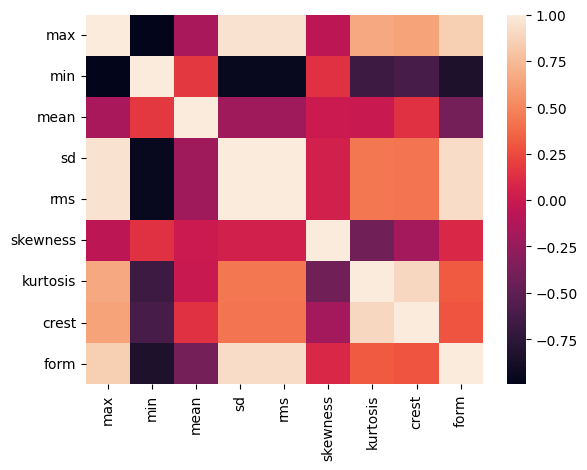

In [17]:
print('Heatmap de correlações entre as features:')
sns.heatmap(df.corr(numeric_only=True))

### **Decisão**

Pensando em implementações futuras, é muito comum que, em aplicações de detecção de falhas, técnicos e engenheiros exijam a possibilidade de visualizar o que está acontecendo quando uma falha for diagnosticada. Dessa forma, o **Plotly foi priorizado** por conta do diferencial relacionado a ter uma biblioteca equivalente em javascript, já que os engenheiros e técnicos possivelmente visualizarão os gráficos por meio de uma aplicação WEB.